In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
f = open('plots', 'r')
contents = f.read()
f.close()
plots = contents.split('<EOS>')

In [3]:
keywords = [
    'screams',
    'cries',
    'rejects',
    'resists',
    'accepts',
    'forgives',
    'sings',
    'pleads',
    'reminds',
    'thanks',
    'married',
    'stabs',
    'begs',
    'storms',
    'kisses',
    'murdered',
    'owns',
    'chases',
    'instructs',
    'lands',
    'owes',
    'orders',
    'challenges',
    'kills',
    'saves',
    'defeats',
    'proposes',
    'beats',
    'rescues',
    'kidnaps'
]
keywords.reverse()

In [4]:
he_words = {}
she_words = {}
for p in plots:
    for w in p.split(' he ')[1:]:
        verb = w.split(' ')[0]
        
        if verb in he_words:
            he_words[verb] += 1
        else:
            he_words[verb] = 1
            
    for w in p.split('He ')[1:]:
        verb = w.split(' ')[0]
        
        if verb in he_words:
            he_words[verb] += 1
        else:
            he_words[verb] = 1
    
    for w in p.split(' she ')[1:]:
        verb = w.split(' ')[0]
        
        if verb in she_words:
            she_words[verb] += 1
        else:
            she_words[verb] = 1
            
    for w in p.split('She ')[1:]:
        verb = w.split(' ')[0]
        
        if verb in she_words:
            she_words[verb] += 1
        else:
            she_words[verb] = 1

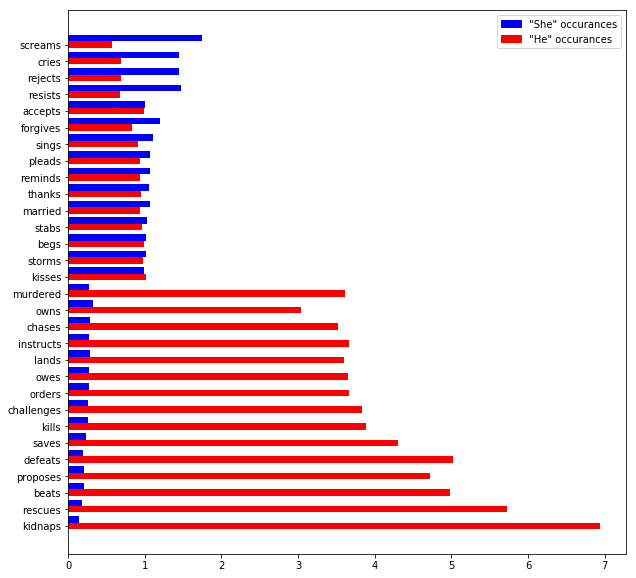

In [5]:
y_axis = np.linspace(0,len(keywords),len(keywords))
fig, ax = plt.subplots(figsize=(10, 10))


s = pd.Series(he_words)[keywords]/pd.Series(she_words)[keywords]
ax.barh(y_axis, s, height=0.4, color='red', align='center')

s = pd.Series(she_words)[keywords]/pd.Series(he_words)[keywords]
ax.barh(y_axis+0.4, s, height=0.4, color='blue', align='center')


plt.yticks(y_axis, keywords) #fontsize=40
red_patch = mpatches.Patch(color='blue', label='"She" occurances')
blue_patch = mpatches.Patch(color='red', label='"He" occurances')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

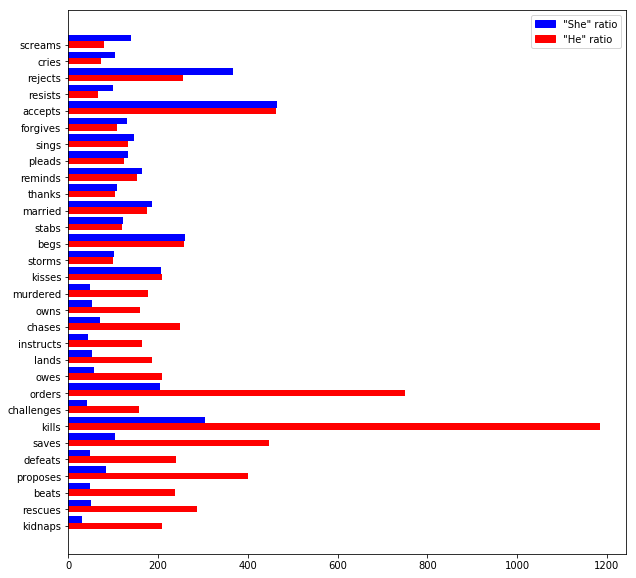

In [6]:
y_axis = np.linspace(0,len(keywords),len(keywords))
fig, ax = plt.subplots(figsize=(10, 10))


s = pd.Series(he_words)[keywords]
ax.barh(y_axis, s, height=0.4, color='red', align='center')

s = pd.Series(she_words)[keywords]
ax.barh(y_axis+0.4, s, height=0.4, color='blue', align='center')


plt.yticks(y_axis, keywords) #fontsize=40
red_patch = mpatches.Patch(color='blue', label='"She" ratio')
blue_patch = mpatches.Patch(color='red', label='"He" ratio')
plt.legend(handles=[red_patch, blue_patch])

plt.show()